In [1]:
# Bloque de importación de dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

In [2]:
!pwd

/home/sgrodriguez/Proyectos/TimeSeries/kedro_timeseries/notebooks


In [3]:
data = pd.read_csv('../data/01_raw/Electric_Production.csv', parse_dates = ['DATE'])
data.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [4]:
data.dtypes

DATE     datetime64[ns]
Value           float64
dtype: object

In [5]:
data.set_index("DATE", inplace = True)

In [6]:
data.columns = ['y']
data['ds'] = data.index
data.head()

,y,ds
DATE,,
1985-01-01,72.5052,1985-01-01
1985-02-01,70.6720,1985-02-01
1985-03-01,62.4502,1985-03-01
1985-04-01,57.4714,1985-04-01
1985-05-01,55.3151,1985-05-01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       397 non-null    float64       
 1   ds      397 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [8]:
test_size = 0.2
def split_data(data, test_size = test_size):
    test_set = int(data.shape[0]*test_size)
    train = data.iloc[:-test_set]
    test = data.iloc[-test_set:]
    return train, test

In [9]:
train, test = split_data(data)

In [10]:
display(train, test)

,y,ds
DATE,,
1985-01-01,72.5052,1985-01-01
1985-02-01,70.6720,1985-02-01
1985-03-01,62.4502,1985-03-01
1985-04-01,57.4714,1985-04-01
1985-05-01,55.3151,1985-05-01
...,...,...
2011-02-01,107.3753,2011-02-01
2011-03-01,99.1028,2011-03-01
2011-04-01,89.3583,2011-04-01


,y,ds
DATE,,
2011-07-01,114.7068,2011-07-01
2011-08-01,113.5958,2011-08-01
2011-09-01,99.4712,2011-09-01
2011-10-01,90.3566,2011-10-01
2011-11-01,93.8095,2011-11-01
...,...,...
2017-09-01,98.6154,2017-09-01
2017-10-01,93.6137,2017-10-01
2017-11-01,97.3359,2017-11-01


# Entrenamiento del modelo

In [15]:
string = '0, 0, 0, 0'
string2 = list(map(int, string.split(',')))
string2

[0, 0, 0, 0]

In [12]:
m.fit(train)

2022-06-02 21:29:04,985 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-06-02 21:29:04,988 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.84795


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1054.37   0.000566188       115.737           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       1055.86   0.000101193       117.591   8.236e-07       0.001      242  LS failed, Hessian reset 
     199        1056.2   4.14176e-05        74.684      0.8284      0.8284      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       1056.58   0.000209532       164.526   1.573e-06       0.001      383  LS failed, Hessian reset 
     299       1056.79   0.000227173       53.7526           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373        1056.9   2.83867e-08       64.1751      0.1551      0.5953      548   
Optimization terminated normally: 
  Convergence detected: rel

# Predicciones

In [13]:
future = m.make_future_dataframe(periods = 79, freq = 'MS')
forecast = m.predict(future)

/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


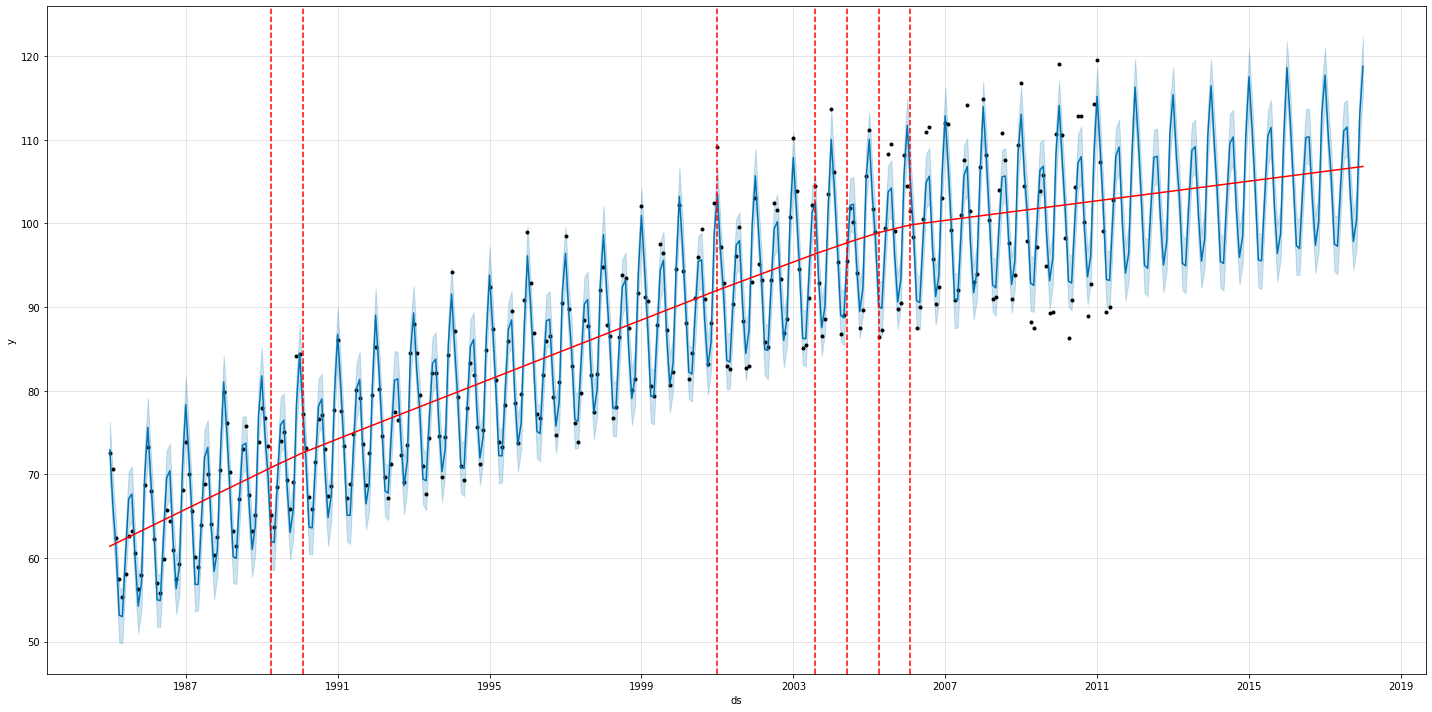

In [14]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast, figsize = (20, 10))
add_changepoints_to_plot(fig.gca(), m, forecast);

/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


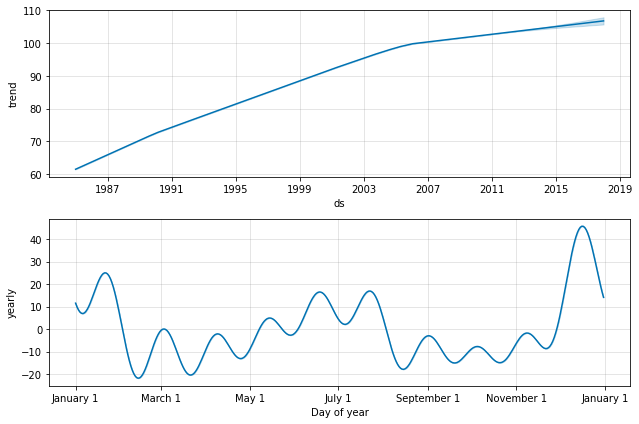

In [15]:
m.plot_components(forecast);

# Evaluación del modelo

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,61.410001,69.578899,76.249113,61.410001,61.410001,11.508314,11.508314,11.508314,11.508314,11.508314,11.508314,0.0,0.0,0.0,72.918314
1,1985-02-01,61.598063,62.481760,69.338134,61.598063,61.598063,4.300704,4.300704,4.300704,4.300704,4.300704,4.300704,0.0,0.0,0.0,65.898767
2,1985-03-01,61.767925,57.643064,64.368074,61.767925,61.767925,-0.511056,-0.511056,-0.511056,-0.511056,-0.511056,-0.511056,0.0,0.0,0.0,61.256870
3,1985-04-01,61.955988,49.905306,56.516634,61.955988,61.955988,-8.807137,-8.807137,-8.807137,-8.807137,-8.807137,-8.807137,0.0,0.0,0.0,53.148851
4,1985-05-01,62.137983,49.781232,56.232863,62.137983,62.137983,-9.141243,-9.141243,-9.141243,-9.141243,-9.141243,-9.141243,0.0,0.0,0.0,52.996740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2017-09-01,106.616039,100.185907,107.010936,105.600805,107.637683,-2.988758,-2.988758,-2.988758,-2.988758,-2.988758,-2.988758,0.0,0.0,0.0,103.627281
393,2017-10-01,106.664145,94.501013,101.182578,105.630685,107.707440,-8.821102,-8.821102,-8.821102,-8.821102,-8.821102,-8.821102,0.0,0.0,0.0,97.843043
394,2017-11-01,106.713855,97.020309,103.931702,105.661592,107.780412,-6.205222,-6.205222,-6.205222,-6.205222,-6.205222,-6.205222,0.0,0.0,0.0,100.508633
395,2017-12-01,106.761961,109.331208,116.203759,105.692547,107.851432,6.161629,6.161629,6.161629,6.161629,6.161629,6.161629,0.0,0.0,0.0,112.923590


In [40]:
# Períodos a predecir
periods = 36

forecast_prophet = forecast[['ds', 'yhat']].iloc[-test.shape[0]:-test.shape[0]+periods, :]
forecast_prophet.set_index('ds', inplace=True)
forecast_prophet

,yhat
ds,
2011-07-01,108.088232
2011-08-01,109.141877
2011-09-01,100.040409
2011-10-01,94.059978
2011-11-01,96.456362
2011-12-01,107.918518
2012-01-01,116.304271
2012-02-01,110.081270
2012-03-01,103.020662


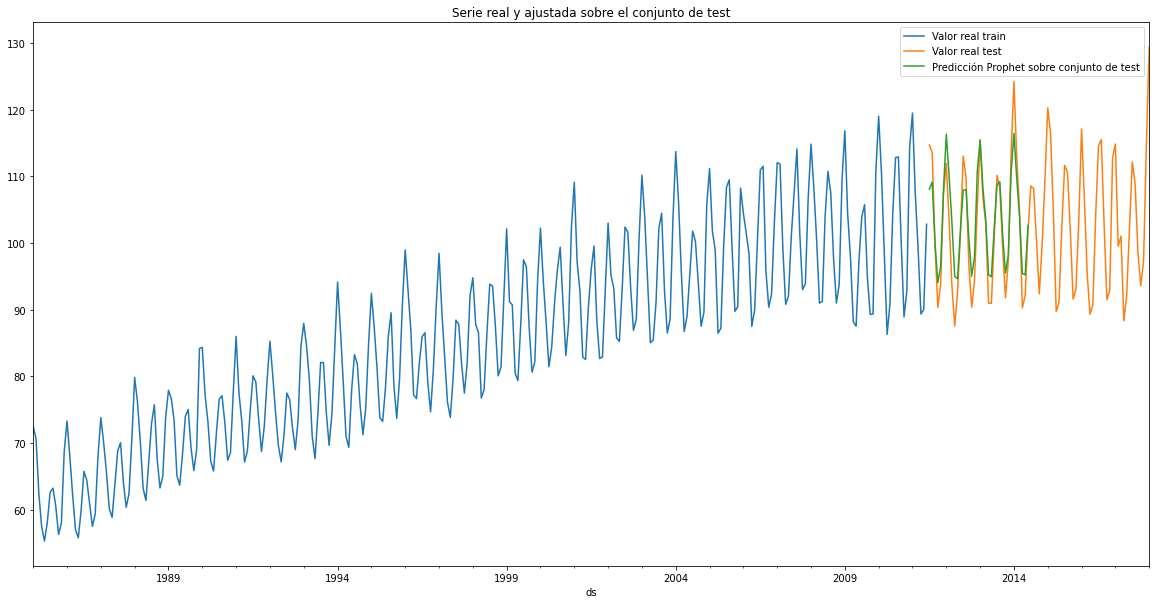

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
train['y'].plot(ax = ax, label = 'Valor real train')
test['y'].plot(ax = ax, label = 'Valor real test')
forecast_prophet['yhat'].plot(ax = ax, label = f'Predicción Prophet sobre conjunto de test')
ax.set_title('Serie real y ajustada sobre el conjunto de test')
ax.legend();

In [26]:
type(m)

prophet.forecaster.Prophet

In [42]:
def evaluate(test, forecast_df, window_forecast):
    RMSE = []
    MAE = []
    horizon = forecast_df.shape[0]
    w = window_forecast

    for i in range(0, horizon, w):
        rmse_value = round(np.sqrt(np.mean((test[i:i+w]['y'] - forecast_df[i:i+w]['yhat'])**2)), 3)
        mae_value = round(np.mean(np.absolute(test[i:i+w]['y'] - forecast_df[i:i+w]['yhat'])), 3)
        RMSE.append(rmse_value)
        MAE.append(mae_value)

    index_names = [f'RMSE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
    MAE_names = [f'MAE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
    index_names.extend(MAE_names)
    index_series = pd.Series(index_names, name = 'Metrics')

    metrics_values = RMSE
    metrics_values.extend(MAE)
    #metrics_series = pd.Series(metrics_values, name = 'Prophet')
    
    metrics_df = pd.DataFrame({'Prophet': metrics_values}, index = index_series)
    #metrics_df = pd.concat([index_series, metrics_series], axis = 1).set_index('Metrics')

    return metrics_df

In [89]:
window_forecast = 6

metrics_df = evaluate(test, forecast_prophet, window_forecast)

with pd.option_context('display.max_columns', None): 
    display(metrics_df)

,Prophet
Metrics,
RMSE_1-6,3.765
RMSE_7-12,5.952
RMSE_13-18,4.270
RMSE_19-24,2.527
RMSE_25-30,2.232
RMSE_31-36,4.258
MAE_1-6,3.097
MAE_7-12,5.080
MAE_13-18,4.096


# Comparación con modelo Naive (baseline)

In [90]:
forecast_naive = pd.DataFrame({'yhat': train['y'].iloc[-1]}, index = test.index[:periods])
forecast_naive.head()

,yhat
DATE,
2011-07-01,102.8204
2011-08-01,102.8204
2011-09-01,102.8204
2011-10-01,102.8204
2011-11-01,102.8204


In [61]:
from typing import Dict

In [63]:
def evaluate_forecasts(test: pd.DataFrame, forecasts: Dict[pd.DataFrame, pd.DataFrame], window_forecast) -> pd.DataFrame:
    horizon = forecasts['Naive'].shape[0]
    w = window_forecast
    
    # Creamos índice con las métricas
    index_names = [f'RMSE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
    MAE_names = [f'MAE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
    index_names.extend(MAE_names)
    index_series = pd.Series(index_names, name = 'Metrics')

In [85]:
forecasts = {'Naive': forecast_naive,
             'Prophet': forecast_prophet}

In [87]:
horizon = forecasts['Naive'].shape[0]
w = window_forecast

index_names = [f'RMSE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
MAE_names = [f'MAE_{i}-{i+(w-1)}' for i in range(1, horizon+1, w)]
index_names.extend(MAE_names)
index_series = pd.Series(index_names, name = 'Metrics')

metrics = {}

for model, forecast in forecasts.items():
    RMSE = []
    MAE = []
    
    for i in range(0, horizon, w):
        rmse_value = round(np.sqrt(np.mean((test[i:i+w]['y'] - forecast[i:i+w]['yhat'])**2)), 3)
        mae_value = round(np.mean(np.absolute(test[i:i+w]['y'] - forecast[i:i+w]['yhat'])), 3)
        RMSE.append(rmse_value)
        MAE.append(mae_value)

    metrics_values = RMSE
    metrics_values.extend(MAE)
    
    metrics[model] = pd.Series(metrics_values)

metrics_df = pd.DataFrame(metrics).set_index(index_series)

In [88]:
metrics_df

,Naive,Prophet
Metrics,,
RMSE_1-6,9.359,3.765
RMSE_7-12,9.187,5.952
RMSE_13-18,8.401,4.270
RMSE_19-24,8.763,2.527
RMSE_25-30,7.754,2.232
RMSE_31-36,11.808,4.258
MAE_1-6,8.666,3.097
MAE_7-12,7.657,5.080
MAE_13-18,7.784,4.096


# Prueba con otros hiperparámetros

In [31]:
# Creamos el modelo
m2 = Prophet(changepoint_prior_scale = 0.5,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 0.1)


# Ajustamos con los datos de entrenamiento
m2.fit(train)

2022-06-02 12:32:21,765 - prophet - INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2022-06-02 12:32:21,766 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.84795
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1104.19    0.00258683       62.6668           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1106.87    0.00172014       190.008           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1109.35     0.0173962       38.8434           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1110.32    0.00619665       148.294           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1110.68   0.000288485       16.9335           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        1111.9   0.000425415       12.1604           1           1     1403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       1111.96    0.00314599       33.4464      0.6636      0.6636     1532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       1111.99   0.000378516       10.6852           1           1     1647   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       1112.02   3.29685e-05       9.24406           1           1     1760   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       1112.13    0.00650795       18.8493           1           1     1874   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       1112.28    0.00116042       7

In [37]:
# Realizamos predicciones
future2 = m2.make_future_dataframe(periods = 79, freq = 'MS')
forecast2 = m2.predict(future2)

/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sgrodriguez/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


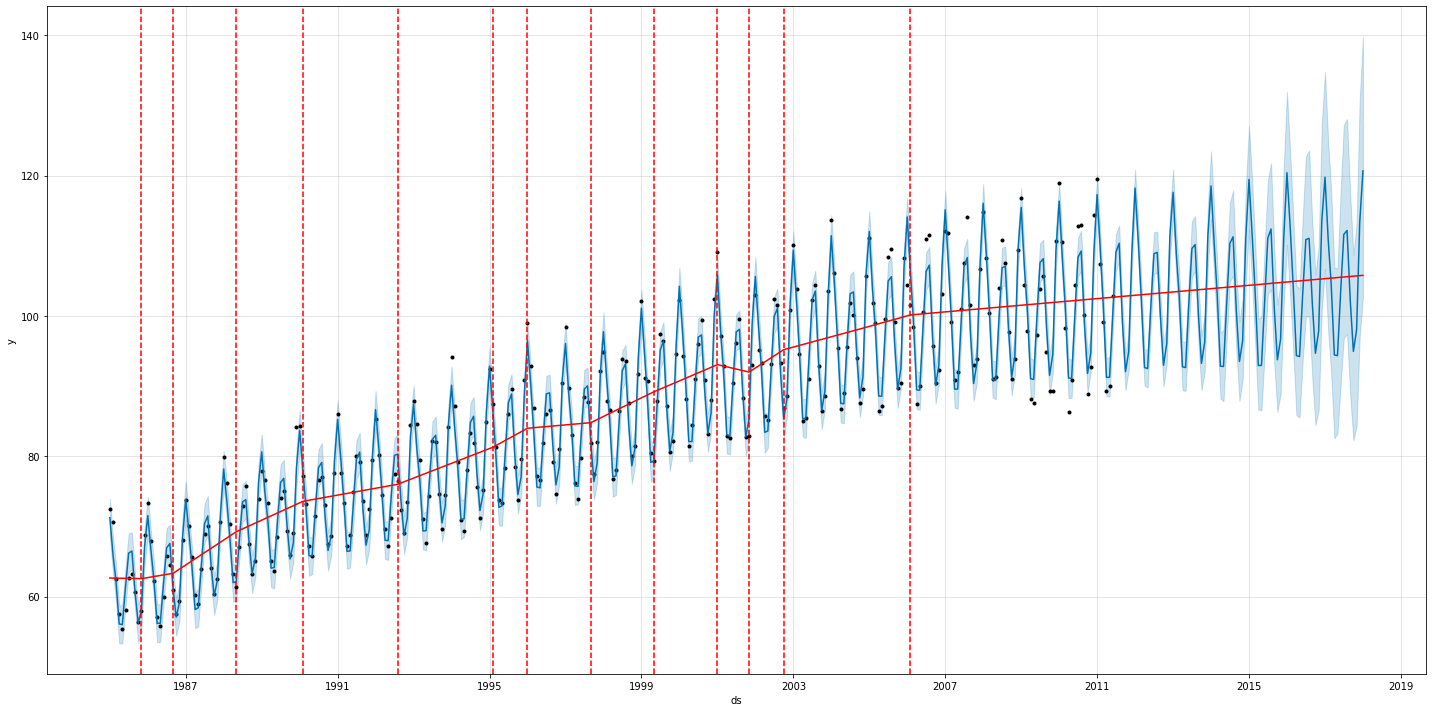

In [38]:
fig = m2.plot(forecast2, figsize = (20, 10))
add_changepoints_to_plot(fig.gca(), m2, forecast2);

In [39]:
forecast2_df = forecast2[['ds', 'yhat']].copy()
forecast2_df.set_index('ds', inplace=True)
forecast2_df = forecast2_df.iloc[-test.shape[0]:, :]
forecast2_df

,yhat
ds,
2011-07-01,109.087746
2011-08-01,110.357540
2011-09-01,99.289321
2011-10-01,92.061440
2011-11-01,94.947001
...,...
2017-09-01,102.187335
2017-10-01,94.942978
2017-11-01,98.049584


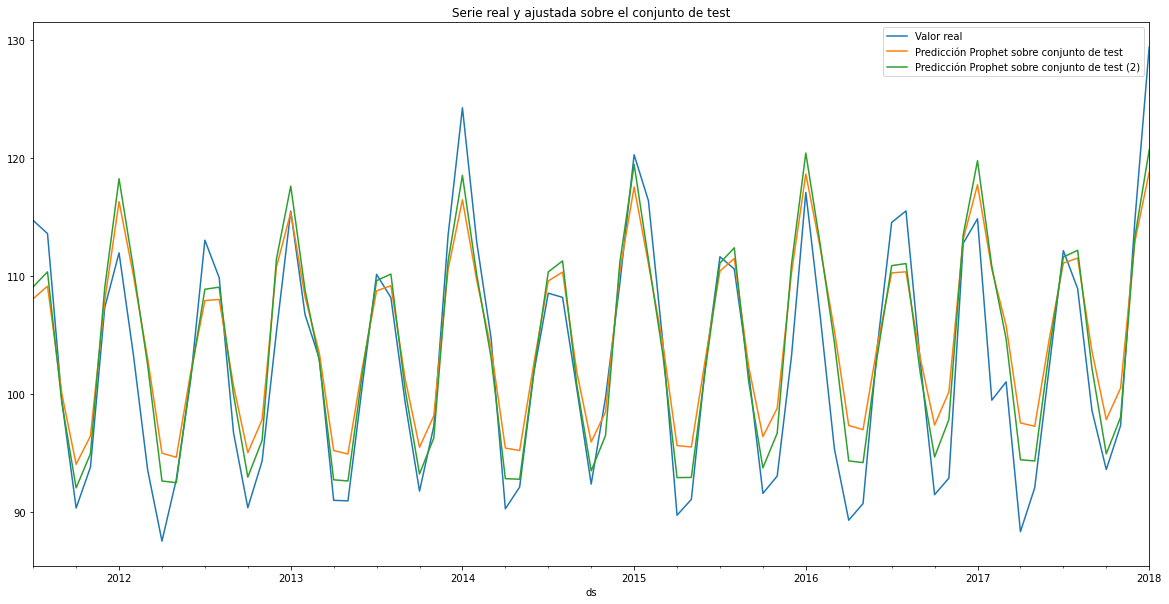

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
test['y'].plot(ax = ax, label = 'Valor real')
forecast_df['yhat'].plot(ax = ax, label = f'Predicción Prophet sobre conjunto de test')
forecast2_df['yhat'].plot(ax = ax, label = f'Predicción Prophet sobre conjunto de test (2)')
ax.set_title('Serie real y ajustada sobre el conjunto de test')
ax.legend();

In [41]:
metrics2_df = evaluate(test, forecast2_df)

with pd.option_context('display.max_columns', None): 
    display(metrics_df, metrics2_df)

/tmp/ipykernel_139258/1724510780.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_series, ignore_index = True)


,RMSE_1-3,RMSE_4-6,RMSE_7-9,RMSE_10-12,RMSE_13-15,RMSE_16-18,RMSE_19-21,RMSE_22-24,RMSE_25-27,RMSE_28-30,RMSE_31-33,RMSE_34-36,RMSE_37-39,RMSE_40-42,RMSE_43-45,RMSE_46-48,RMSE_49-51,RMSE_52-54,RMSE_55-57,RMSE_58-60,RMSE_61-63,RMSE_64-66,RMSE_67-69,RMSE_70-72,RMSE_73-75,RMSE_76-78,RMSE_79-81,MAE_1-3,MAE_4-6,MAE_7-9,MAE_10-12,MAE_13-15,MAE_16-18,MAE_19-21,MAE_22-24,MAE_25-27,MAE_28-30,MAE_31-33,MAE_34-36,MAE_37-39,MAE_40-42,MAE_43-45,MAE_46-48,MAE_49-51,MAE_52-54,MAE_55-57,MAE_58-60,MAE_61-63,MAE_64-66,MAE_67-69,MAE_70-72,MAE_73-75,MAE_76-78,MAE_79-81
0,4.618,2.65,7.143,4.451,3.885,4.623,0.91,3.456,1.525,2.765,4.903,3.496,1.601,2.264,3.467,4.267,0.906,5.933,6.727,5.874,3.869,5.42,7.164,6.262,3.315,3.224,10.606,3.881,2.313,6.832,3.329,3.642,4.551,0.694,3.236,1.468,2.495,3.971,3.008,1.534,1.952,2.747,3.6,0.853,5.861,5.776,4.79,3.24,4.51,6.247,5.606,2.888,3.067,10.606


,RMSE_1-3,RMSE_4-6,RMSE_7-9,RMSE_10-12,RMSE_13-15,RMSE_16-18,RMSE_19-21,RMSE_22-24,RMSE_25-27,RMSE_28-30,RMSE_31-33,RMSE_34-36,RMSE_37-39,RMSE_40-42,RMSE_43-45,RMSE_46-48,RMSE_49-51,RMSE_52-54,RMSE_55-57,RMSE_58-60,RMSE_61-63,RMSE_64-66,RMSE_67-69,RMSE_70-72,RMSE_73-75,RMSE_76-78,RMSE_79-81,MAE_1-3,MAE_4-6,MAE_7-9,MAE_10-12,MAE_13-15,MAE_16-18,MAE_19-21,MAE_22-24,MAE_25-27,MAE_28-30,MAE_31-33,MAE_34-36,MAE_37-39,MAE_40-42,MAE_43-45,MAE_46-48,MAE_49-51,MAE_52-54,MAE_55-57,MAE_58-60,MAE_61-63,MAE_64-66,MAE_67-69,MAE_70-72,MAE_73-75,MAE_76-78,MAE_79-81
0,3.746,1.524,7.566,2.946,3.065,3.99,1.719,1.51,1.345,1.622,3.793,1.525,2.073,2.217,2.964,2.14,1.179,5.113,6.542,3.55,3.377,3.429,7.43,3.837,2.807,1.191,8.717,3.013,1.502,7.49,1.873,2.721,3.501,1.468,1.472,1.203,1.545,3.379,1.105,1.739,2.039,2.273,1.806,1.046,4.525,6.122,3.083,3.031,2.952,6.625,3.249,2.455,1.15,8.717
